In [1]:
!pip install opencv-python numpy matplotlib scikit-learn webcolors

In [9]:
import cv2, numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

css4_db = mcolors.CSS4_COLORS
hex_to_name = {h.lower(): n for n, h in css4_db.items()}

def closest_color_name(rgb):
    min_dist, best = float("inf"), None
    for hex_val, name in hex_to_name.items():
        cr, cg, cb = [int(255*x) for x in mcolors.to_rgb(hex_val)]
        d = (cr-rgb[0])**2 + (cg-rgb[1])**2 + (cb-rgb[2])**2
        if d < min_dist:
            min_dist, best = d, name
    return best

def identify_colors(img_path, num_colors=5):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    small = cv2.resize(img, (100,100), cv2.INTER_AREA)
    pixels = small.reshape(-1,3)
    clt = KMeans(n_clusters=num_colors, random_state=0).fit(pixels)
    counts = np.bincount(clt.labels_)
    cents  = clt.cluster_centers_.astype(int)
    total  = counts.sum()
    results = []
    for idx in np.argsort(-counts):
        pct = counts[idx]/total
        rgb = tuple(cents[idx])
        name = closest_color_name(rgb)
        results.append((name, rgb, pct))
    return results

 darkolivegreen   28.9%  RGB=(58, 96, 33)
          black   22.2%  RGB=(14, 32, 14)
      olivedrab   21.3%  RGB=(136, 151, 77)
  darkslategrey   15.0%  RGB=(14, 76, 95)
      steelblue   12.7%  RGB=(39, 123, 175)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


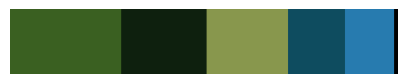

In [10]:
colors = identify_colors("/kaggle/input/test-img/tst.jpg", num_colors=5)
for name, rgb, pct in colors:
    print(f"{name:>15s}  {pct*100:5.1f}%  RGB={rgb}")

bar = np.zeros((50, 300, 3), dtype="uint8")
start = 0
for name, rgb, pct in colors:
    end = start + int(pct*300)
    bar[:, start:end] = rgb
    start = end

plt.figure(figsize=(5,1))
plt.axis("off")
plt.imshow(bar)
plt.show()